In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('predictive_maintenance_dirty_dataset.csv')

In [4]:
df.shape

(305, 7)

In [5]:
df.head()

,Timestamp,Machine_ID,Temperature,Vibration,Pressure,Rotation_Speed,Failure
0,2025-08-01 00:33:00,PUMP_003,47.2 C,~2.26,314.738608,1534.211253,0
1,2025-08-01 01:08:00,PUMP_003,57.896064077536955,2.3837173645764542,NaN,NaN,0
2,2025-08-01 02:04:00,pump-001,51.20981135783017,1.043359877671101,292.750822,1485.942812,False
3,2025-08-01 03:02:00,PUMP_004,45.45987962239394,1.2938481493323541,324.656488,1494.355592,0
4,2025-08-01 03:25:00,PUMP_003,49.87772411252967,2.1777756585612162,314.170111,1520.811546,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       305 non-null    object 
 1   Machine_ID      305 non-null    object 
 2   Temperature     276 non-null    object 
 3   Vibration       275 non-null    object 
 4   Pressure        275 non-null    float64
 5   Rotation_Speed  275 non-null    float64
 6   Failure         305 non-null    object 
dtypes: float64(2), object(5)
memory usage: 16.8+ KB


In [6]:
df.isnull().sum()

Timestamp          0
Machine_ID         0
Temperature       29
Vibration         30
Pressure          30
Rotation_Speed    30
Failure            0
dtype: int64

In [7]:
df['Machine_ID'].unique()

array(['PUMP_003', 'pump-001', 'PUMP_004', 'Pump_002'], dtype=object)

In [8]:
df.duplicated().value_counts()

False    300
True       5
Name: count, dtype: int64

In [9]:
df['Failure'].unique()

array(['0', 'False', 'Error', 'True', '1'], dtype=object)

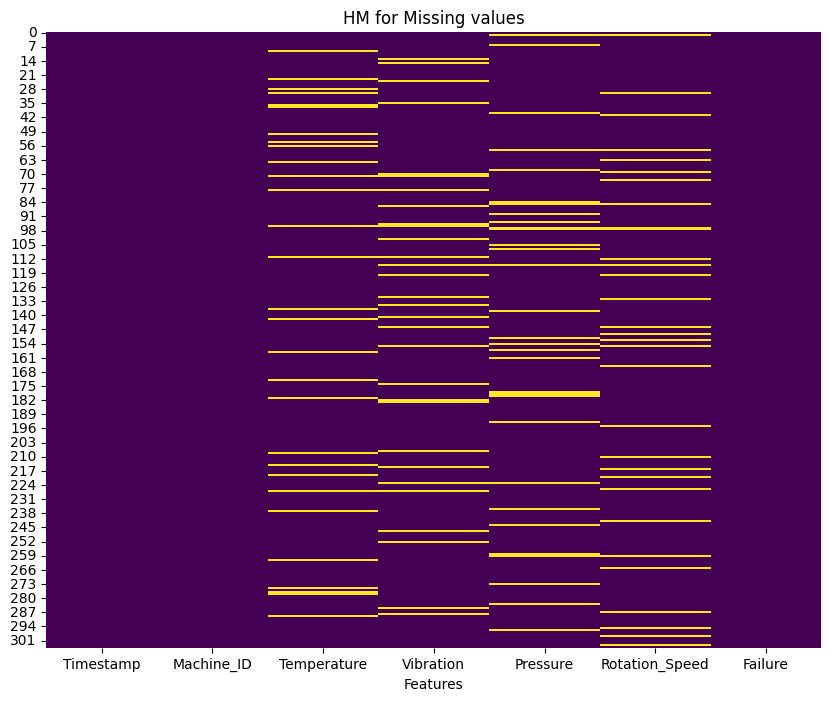

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('HM for Missing values')
plt.xlabel('Features')
plt.show()

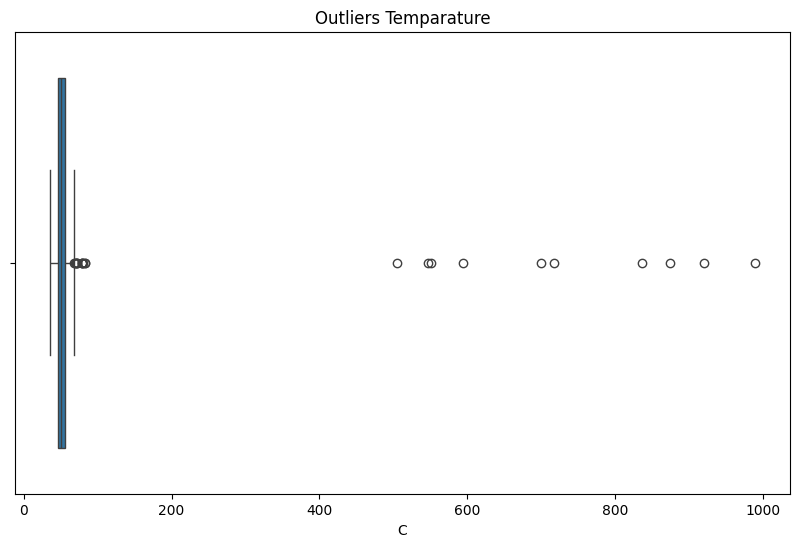

In [29]:
temp_numeric = pd.to_numeric(df['Temperature'].astype(str).str.extract(r'(-?\d+\.?\d*)').iloc[:, 0], errors='coerce') # Tạm thời chuyển đổi trước để visualize
plt.figure(figsize=(10, 6))
sns.boxplot(x=temp_numeric)
plt.title('Outliers Temparature')
plt.xlabel('C')
plt.show()

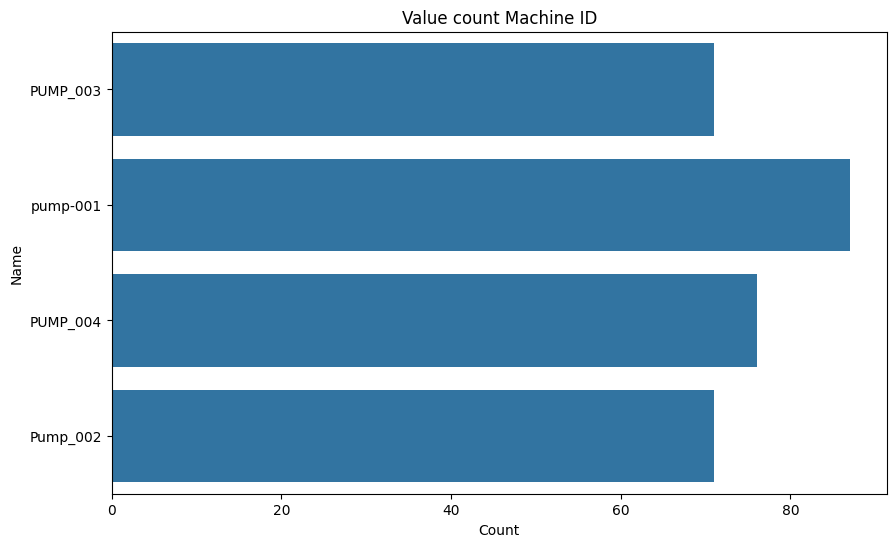

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Machine_ID'])
plt.title('Value count Machine ID')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

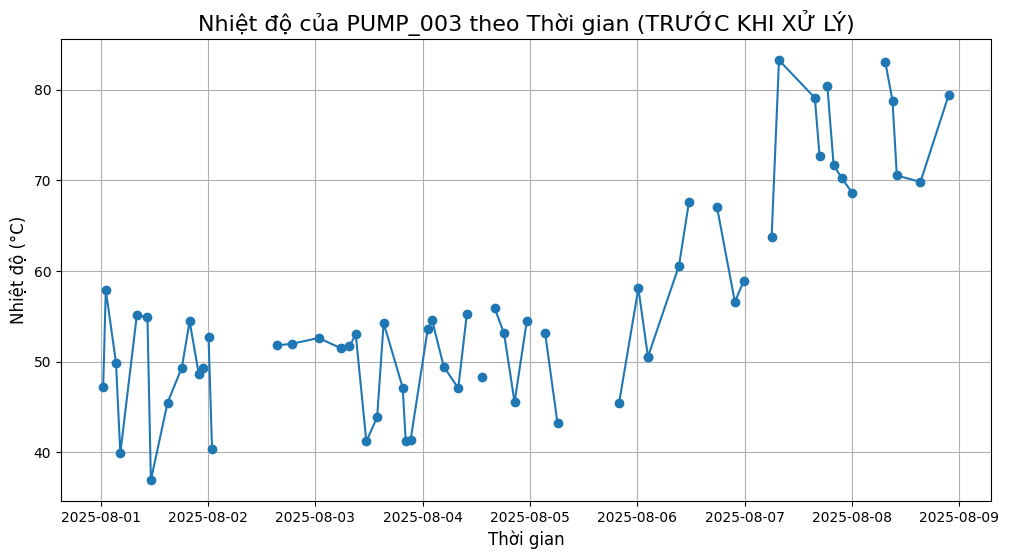

In [30]:
# TẠM THỜI chuyển đổi Timestamp và Temperature để vẽ
df_for_plot = df.copy()
df_for_plot['Timestamp'] = pd.to_datetime(df_for_plot['Timestamp'], errors='coerce')
df_for_plot['Temperature'] = pd.to_numeric(df_for_plot['Temperature'].astype(str).str.extract(r'(-?\d+\.?\d*)').iloc[:, 0], errors='coerce')

# Lọc ra chỉ một máy để biểu đồ được rõ ràng
machine_to_plot = 'PUMP_003'
df_machine_before = df_for_plot[df_for_plot['Machine_ID'].str.upper().str.replace('-', '_') == machine_to_plot].sort_values('Timestamp')

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường, thêm marker='o' để thấy rõ các điểm dữ liệu rời rạc
plt.plot(df_machine_before['Timestamp'], df_machine_before['Temperature'], marker='o', linestyle='-')

# Đặt tiêu đề và nhãn
plt.title(f'Nhiệt độ của {machine_to_plot} theo Thời gian (TRƯỚC KHI XỬ LÝ)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)
plt.grid(True) # Thêm lưới để dễ nhìn

# Hiển thị biểu đồ
plt.show()

In [40]:
# --- BẮT ĐẦU VỚI DATAFRAME 'df' GỐC (BẨN) ---
# Dòng này đảm bảo mỗi lần bạn chạy khối code, bạn đều bắt đầu lại từ đầu
# với dữ liệu gốc sạch sẽ.
df_processed = df.copy()

print("Bắt đầu quy trình làm sạch toàn bộ...")

# --- Bước 1 & 2: Làm sạch cơ bản ---
df_processed.drop_duplicates(inplace=True)
df_processed['Machine_ID'] = df_processed['Machine_ID'].str.upper().str.replace('-', '_')
failure_map = {
    "True": 1, "False": 0, True: 1, False: 0, 
    "1": 1, "0": 0, 1: 1, 0: 0, "Error": np.nan
}
df_processed['Failure'] = df_processed['Failure'].map(failure_map)
print("Bước 1 & 2: Đã xóa trùng lặp và chuẩn hóa.")

# --- Bước 3: Chuyển đổi Kiểu dữ liệu ---
# Đảm bảo 'Timestamp' là một cột trước khi thao tác
if 'Timestamp' in df_processed.index.names:
    df_processed.reset_index(inplace=True)

df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'], errors='coerce')
sensor_cols = ['Temperature', 'Vibration', 'Pressure', 'Rotation_Speed']
for col in sensor_cols:
    df_processed[col] = pd.to_numeric(df_processed[col].astype(str).str.extract(r'(-?\d+\.?\d*)').iloc[:, 0], errors='coerce')
print("Bước 3: Đã chuyển đổi tất cả các cột về đúng kiểu dữ liệu.")

# --- Bước 4: Xử lý Ngoại lệ ---
df_processed.loc[df_processed['Temperature'] > 200, 'Temperature'] = np.nan
df_processed.loc[df_processed['Pressure'] < 0, 'Pressure'] = np.nan
df_processed.loc[df_processed['Rotation_Speed'] > 5000, 'Rotation_Speed'] = np.nan
print("Bước 4: Đã xử lý các giá trị ngoại lệ.")

# --- Bước 5: Resampling và Xử lý Dữ liệu thiếu ---
print("Bước 5: Bắt đầu Resampling...")
df_processed.dropna(subset=['Timestamp'], inplace=True)
df_processed = df_processed.sort_values(by=['Machine_ID', 'Timestamp'])
df_processed.set_index('Timestamp', inplace=True) # Chỉ set_index ngay trước khi cần resample

categorical_cols = ['Machine_ID', 'Failure']
clean_dfs = []

for machine_id in df_processed['Machine_ID'].unique():
    if pd.isna(machine_id): continue
        
    df_machine = df_processed[df_processed['Machine_ID'] == machine_id].copy()
    
    df_numeric = df_machine[sensor_cols].resample('30T').mean()
    df_numeric.interpolate(method='linear', limit_direction='both', inplace=True)
    
    df_categorical = df_machine[categorical_cols].resample('30T').first() 
    df_categorical['Failure'] = df_machine['Failure'].resample('30T').max()
    df_categorical.fillna(method='ffill', inplace=True)
    
    df_machine_clean = pd.concat([df_numeric, df_categorical], axis=1)
    
    clean_dfs.append(df_machine_clean)

df_clean = pd.concat(clean_dfs)
df_clean['Failure'] = df_clean['Failure'].fillna(0).round().astype(int)
df_clean.reset_index(inplace=True)

print("\n--- QUY TRÌNH LÀM SẠCH HOÀN TẤT! ---")
print("DataFrame 'df_clean' đã sẵn sàng.")
print(df_clean.info())

Bắt đầu quy trình làm sạch toàn bộ...
Bước 1 & 2: Đã xóa trùng lặp và chuẩn hóa.
Bước 3: Đã chuyển đổi tất cả các cột về đúng kiểu dữ liệu.
Bước 4: Đã xử lý các giá trị ngoại lệ.
Bước 5: Bắt đầu Resampling...

--- QUY TRÌNH LÀM SẠCH HOÀN TẤT! ---
DataFrame 'df_clean' đã sẵn sàng.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       1468 non-null   datetime64[ns]
 1   Temperature     1468 non-null   float64       
 2   Vibration       1468 non-null   float64       
 3   Pressure        1468 non-null   float64       
 4   Rotation_Speed  1468 non-null   float64       
 5   Machine_ID      1468 non-null   object        
 6   Failure         1468 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), object(1)
memory usage: 74.7+ KB
None


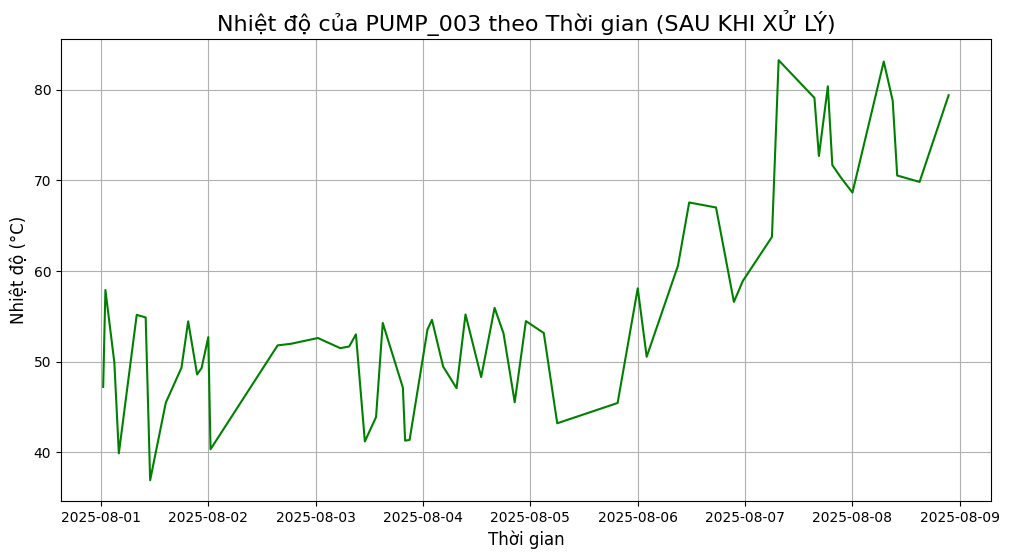

In [42]:
# Bây giờ, vẽ biểu đồ từ DataFrame df_clean
df_machine_after = df_clean[df_clean['Machine_ID'] == machine_to_plot]

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường
plt.plot(df_machine_after['Timestamp'], df_machine_after['Temperature'], color='green')

# Đặt tiêu đề và nhãn
plt.title(f'Nhiệt độ của {machine_to_plot} theo Thời gian (SAU KHI XỬ LÝ)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)
plt.grid(True)

# Hiển thị biểu đồ
plt.show()